# Data Visualisation 2

Key goals:

* Learn some more advanced plotting techniques
    - Style guide (matplotlib rc)
    - binning
    
* Apply some basic transformations 
    - lightkurve
    - phase-folding

* Get started with exoplanet models (i.e. transit models & RV models)

* Create interactive plots with bokeh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
import seaborn as sns

Matplotlib created a temporary config/cache directory at /var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/matplotlib-sk67iecc because the default path (/Users/hosborn/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Using Lightkurve to access timeseries

Lightkurve has tonnes of useful tutorials, for example - https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html

In [2]:
import lightkurve as lk

search_result = lk.search_lightcurve("TIC 259377017", author="SPOC",exptime=120) 
#Specifying the author and the exposure time so we don't get multiple lightcurves for each sector.
lc_collection = search_result.download_all()

Lightkurve also lets us simply plot the raw timeseries using `.plot()`

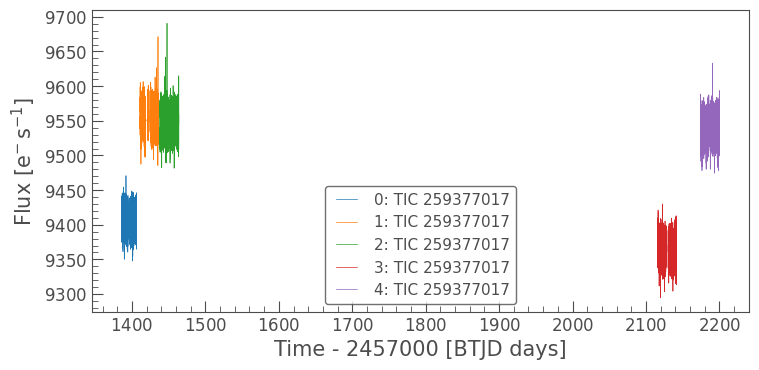

In [3]:
lc_collection.plot();

We can also stitch these together, flatten them to using some pre-defined "window" duration, and then cut outliers:

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

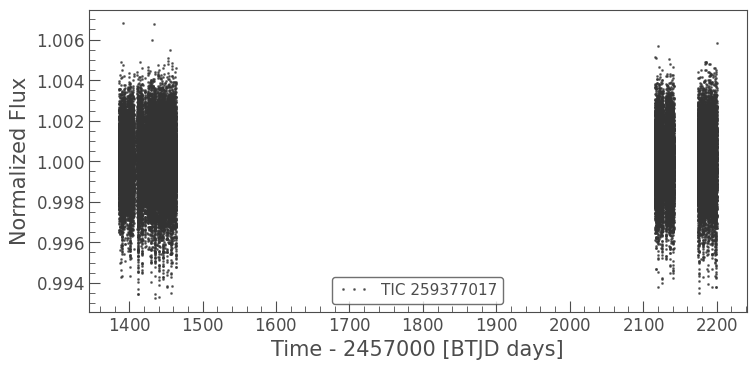

In [4]:
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot(marker='.', alpha=0.66, linewidth=0.0) #<- this is the only way to turn off lines!
#();

This is not so useful as we cannot see the timeseries ourselves.

If we replot as two subplots, then we can see there are clearly transits present!

Text(0, 0.5, 'Flux [ppt]')

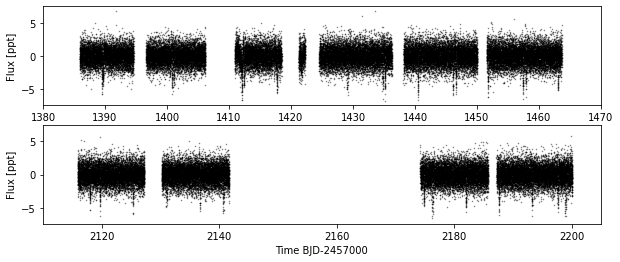

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(lc.time.value,1000*(lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.xlim(1380,1470)
plt.ylabel("Flux [ppt]")

plt.subplot(212)
plt.plot(lc.time.value,1000*(lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.xlim(2110,2205)
plt.xlabel("Time BJD-2457000")
plt.ylabel("Flux [ppt]")

Text(0, 0.5, 'Flux [ppt]')

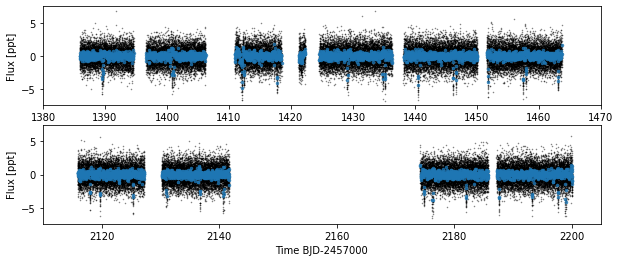

In [6]:
binned_lc = lc.bin(time_bin_size=0.5/24) #<- binning to half-hour bins

plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(lc.time.value,1000*(lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.plot(binned_lc.time.value,1000*(binned_lc.flux.value-1),'.',alpha=0.75,markersize=5)
plt.xlim(1380,1470)
plt.ylabel("Flux [ppt]")

plt.subplot(212)
plt.plot(lc.time.value,1000*(lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.plot(binned_lc.time.value,1000*(binned_lc.flux.value-1),'.',alpha=0.75,markersize=5)
plt.xlim(2110,2205)
plt.xlabel("Time BJD-2457000")
plt.ylabel("Flux [ppt]")


### Using seaborn to vary plot style

In [7]:
#Changing to a plot stye:
sns.set_style("darkgrid")
#options = ["white", "dark", "whitegrid", "darkgrid", "ticks"]

# Changing to a new colour style:
sns.set_palette("viridis")
#a few options = ["Accent","Paired","Pastel1","Pastel2","magma","plasma","viridis"]
# Here's some more: https://seaborn.pydata.org/tutorial/color_palettes.html

Text(0, 0.5, 'Flux [ppt]')

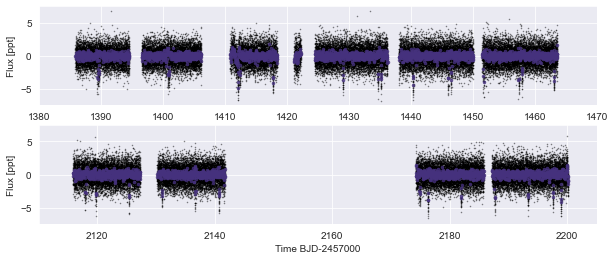

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(211)
plt.plot(lc.time.value,1000*(lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.plot(binned_lc.time.value,1000*(binned_lc.flux.value-1),'.',alpha=0.75,markersize=5)
plt.xlim(1380,1470)
plt.ylabel("Flux [ppt]")

plt.subplot(212)
plt.plot(lc.time.value,1000*(lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.plot(binned_lc.time.value,1000*(binned_lc.flux.value-1),'.',alpha=0.75,markersize=5)
plt.xlim(2110,2205)
plt.xlabel("Time BJD-2457000")
plt.ylabel("Flux [ppt]")

### Style guide:

We can also use the "rc" to save specific plotting settings throughout the session. 

Alternatively the `.matplotlibrc` text file in the home directory can be modified

In [9]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)

# v allows us to use latex when plotting
rc('text.latex', preamble=r'\usepackage{cmbright}') 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]

#Options
params = {'text.usetex' : True,
          'font.size' : 12,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 


/var/folders/p0/tmr0j01x4jb3qrbc5b0gnxcw0000gn/T/ipykernel_50542/3591594543.py:8: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


## Phase-folding

We can use lightkurve to phase-fold lightcurve. 

This is effectively looping the data once per period to build up SNR at a specified orbit.

Text(0, 0.5, 'Flux [ppt]')

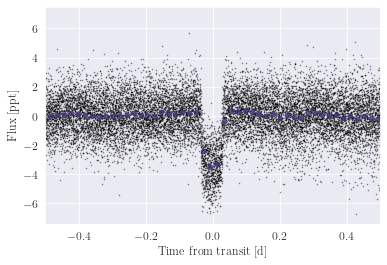

In [10]:
phs_lc=lc.fold(period=5.6605731, epoch_time=1389.50285)
bin_phs_lc = phs_lc.bin(time_bin_size=0.5/24)
plt.plot(phs_lc.time.value,1000*(phs_lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.plot(bin_phs_lc.time.value,1000*(bin_phs_lc.flux.value-1),'.',alpha=0.8,markersize=9)
plt.xlim(-0.5,0.5)
plt.xlabel("Time from transit [d]")
plt.ylabel("Flux [ppt]")

### Creating a transit model with Batman:

Let's use the batman package to create a model for this transit. The parameter values here come direct from ExoFop for this target (https://exofop.ipac.caltech.edu/tess/target.php?id=259377017)

In [16]:
import batman
params = batman.TransitParams()
params.t0 = 1389.50285               #time of inferior conjunction
params.per = 5.6605731               #orbital period
params.rp = 0.05701                  #planet radius (in units of stellar radii)
params.a = 0.04526/0.374358*215      #semi-major axis (in units of stellar radii)
params.ecc = 0.0
params.w = 90.                       #longitude of periastron (in degrees)
params.inc = 89.36
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(1389.50285-0.5, 1389.50285+0.5, 500)
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

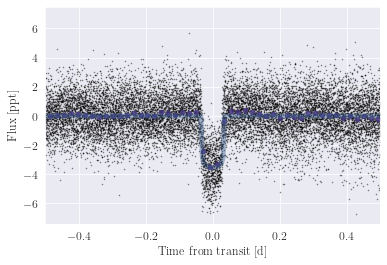

In [20]:
plt.plot(phs_lc.time.value,1000*(phs_lc.flux.value-1),'.k',alpha=0.5,markersize=1)
plt.plot(bin_phs_lc.time.value,1000*(bin_phs_lc.flux.value-1),'.',alpha=0.8,markersize=9)
plt.xlim(-0.5,0.5)
plt.xlabel("Time from transit [d]")
plt.ylabel("Flux [ppt]")

plt.plot(t-1389.50285,1000*(flux-1),linewidth=5,alpha=0.4)

Here we clearly see a transit of TOI-270 c.

But what if we don't know the period? We need to search a transit model possible periods to find the true one...

We can also do this with lightkurve. The resulting periodogram is the response of the lightcurve to the model for each period.

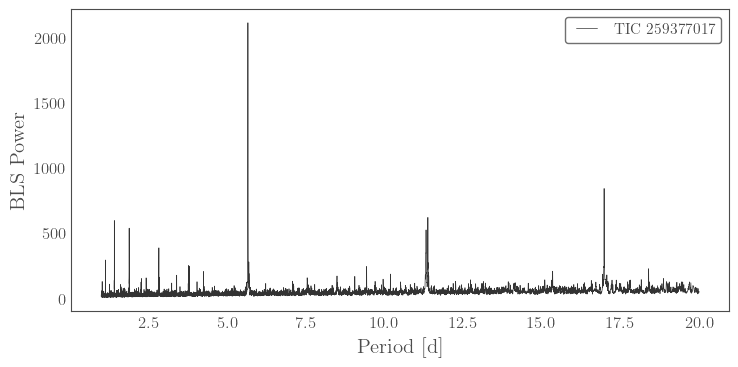

In [11]:
period = np.geomspace(1, 20, 10000) #geomspace creates log-stepped values
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

We can clearly see peaks at 5.7 and 11.4 days - two of the three known planets! The 3.4d signal is muted though, likely becayse it is being influenced by the 5.7d peak.

Lightkurve also enables interactive bls searches! (This may or may not work):

In [14]:
lc.interact_bls()

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8993';                       use --allow-websocket-origin=localhost:8993 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8993 to permit this; currently we allow origins {'localhost:8888'}


## Interactive plots with bokeh

Now let's put this all together and try to plot interactive plot with Bokeh

In [30]:
from bokeh.plotting import figure, output_file, save, show
from bokeh.models import Range1d
from bokeh.layouts import layout, row
from matplotlib import colors

cmap=[colors.rgb2hex(plt.cm.get_cmap('viridis', 5)(i)) for i in range(5)] #Defining a colormap in hex codes

fig = figure(plot_width=800, plot_height=500)
#Initialising two figures
fig_1 = figure(height=240,width=800)
fig_2 = figure(height=240,width=800)

#Splitting into two figures above and below time=2000:
ix = lc.time.value<2000
binned_ix = binned_lc.time.value<2000

#Plotting raw and binned values:
fig_1.circle(lc.time.value[ix], (lc.flux.value[ix]-1)*1000, size=0.8, color="black", alpha=0.5)
fig_1.circle(binned_lc.time.value[binned_ix],(binned_lc.flux.value[binned_ix]-1)*1000,size=3.0,
             color=cmap[0],
             legend_label="binned flux", alpha=0.8)
       
fig_2.circle(lc.time.value[~ix], (lc.flux.value[~ix]-1)*1000, size=0.8, color="black", alpha=0.5)
fig_2.circle(binned_lc.time.value[~binned_ix],(binned_lc.flux.value[~binned_ix]-1)*1000,size=3.0,
             color=cmap[0],
             legend_label="binned flux", alpha=0.8)

#Including a transit model using the times from lc.time:
lcm = batman.TransitModel(params, lc.time.value)
lcflux = lcm.light_curve(params)

fig_1.line(lc.time.value[ix], (lcflux[ix]-1)*1000, color=cmap[3],alpha=0.66,line_width=2.5)
fig_2.line(lc.time.value[~ix], (lcflux[~ix]-1)*1000, color=cmap[3],alpha=0.66,line_width=2.5)

# Specifying the ranges and axes labels:
fig_1.x_range=Range1d(1380,1470)
fig_2.x_range=Range1d(2110,2205)
fig_1.yaxis.axis_label = "Flux [ppt]"
fig_2.yaxis.axis_label = "Flux [ppt]"
fig_1.xaxis.axis_label = "Time [BJD-2457000]"
fig_2.xaxis.axis_label = "Time [BJD-2457000]"

#Finishing off by stacking them together:
p = layout([fig_1,fig_2], sizing_mode='stretch_both')
show(p)

### Excercise

* Try to create transit models for the other two planets and include these in an interative plot
* Try to add phase-folded transits and models to this interactive plot.